<a href="https://colab.research.google.com/github/sneha-4-22/cat-dog-image-classification/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [42]:
# 3
# Create image generators using ImageDataGenerator
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,  # Example: Add shear transformation
    zoom_range=0.2,   # Example: Add zoom transformation
    horizontal_flip=True  # Example: Add horizontal flip
)

validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Set up the flow_from_directory for each dataset
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,  # Corrected from BATCH_SIZE
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,  # Corrected from BATCH_SIZE
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,  # Keep batch size as 1 for the test set
    class_mode=None,
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


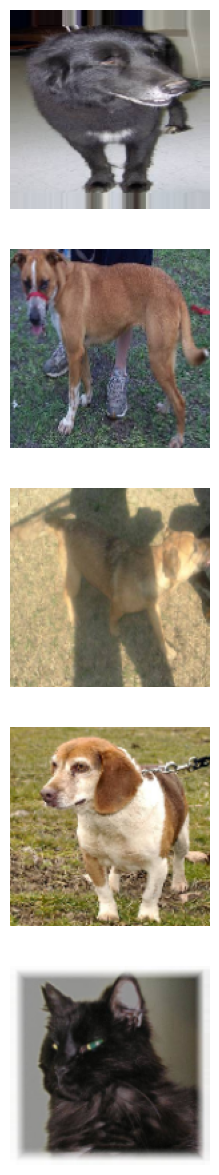

In [43]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [44]:
# 5
# Recreate the train_image_generator using ImageDataGenerator with random transformations
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,  # Example: Add rotation transformation
    width_shift_range=0.2,  # Example: Add width shift transformation
    height_shift_range=0.2,  # Example: Add height shift transformation
    fill_mode='nearest'  # Example: Fill mode for transformations
)


Found 2000 images belonging to 2 classes.


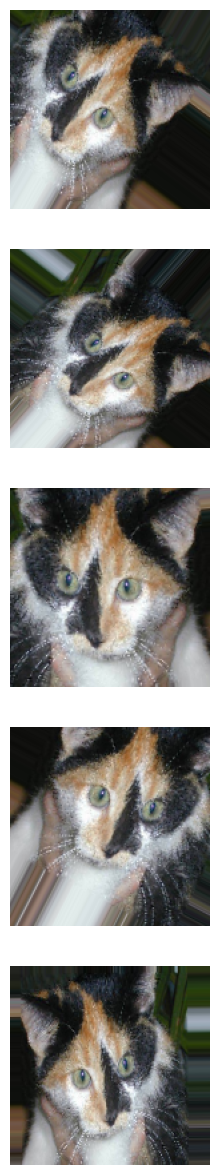

In [45]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [46]:
# 7
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten the layers and add Dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [47]:
# 8
# Use the fit method to train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // BATCH_SIZE,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // BATCH_SIZE
)


Epoch 1/15
15/15 [==============================] - 134s 9s/step - loss: 0.9390 - accuracy: 0.5096 - val_loss: 0.6921 - val_accuracy: 0.5424
Epoch 2/15
15/15 [==============================] - 126s 8s/step - loss: 0.6929 - accuracy: 0.5128 - val_loss: 0.6885 - val_accuracy: 0.5045
Epoch 3/15
15/15 [==============================] - 124s 8s/step - loss: 0.6906 - accuracy: 0.5171 - val_loss: 0.6876 - val_accuracy: 0.5837
Epoch 4/15
15/15 [==============================] - 130s 9s/step - loss: 0.6834 - accuracy: 0.5475 - val_loss: 0.6601 - val_accuracy: 0.5681
Epoch 5/15
15/15 [==============================] - 132s 9s/step - loss: 0.6782 - accuracy: 0.5556 - val_loss: 0.6590 - val_accuracy: 0.6004
Epoch 6/15
15/15 [==============================] - 130s 9s/step - loss: 0.6768 - accuracy: 0.5401 - val_loss: 0.6571 - val_accuracy: 0.5926
Epoch 7/15
15/15 [==============================] - 125s 8s/step - loss: 0.6639 - accuracy: 0.5828 - val_loss: 0.6515 - val_accuracy: 0.5960
Epoch 8/15
15

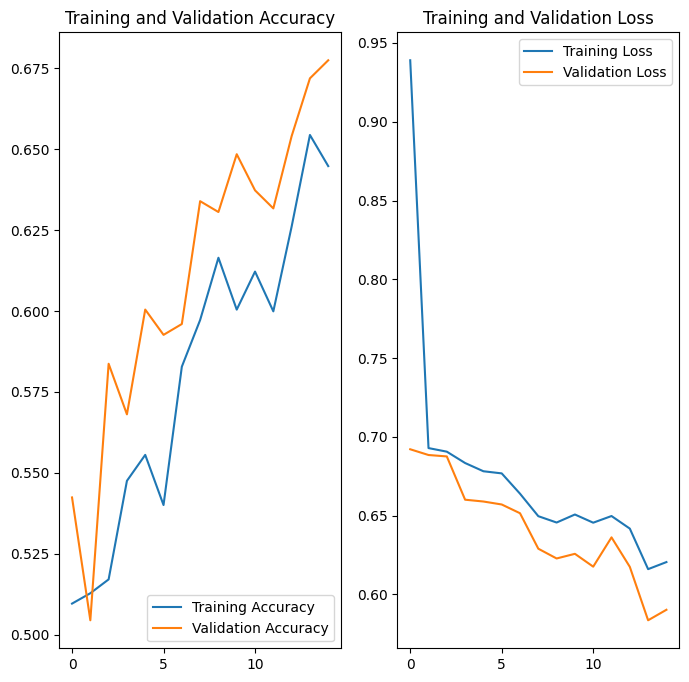

In [50]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [82]:
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    classes=['test']  # Replace with the actual class label for the test set
)


Found 0 images belonging to 1 classes.


Error loading image .DS_Store: cannot identify image file <_io.BytesIO object at 0x7a9c227db1a0>
2/2 [==============================] - 1s 220ms/step


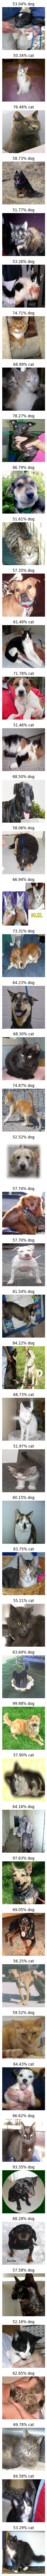

In [84]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_dir_path = os.path.join(PATH, 'test')
test_image_filenames = sorted(os.listdir(test_dir_path))

test_images = []

for image_filename in test_image_filenames:
    image_path = os.path.join(test_dir_path, image_filename)

    try:
        img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = img_to_array(img)
        img_array /= 255.0
        test_images.append(img_array)
    except Exception as e:
        print(f"Error loading image {image_filename}: {e}")

test_images = np.array(test_images)

if test_images.size > 0:
    probabilities = model.predict(test_images)

    plotImages(test_images, probabilities)
else:
    print("No valid test images available.")


In [86]:
import numpy as np
answers = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
           1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
           1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
           1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
           0, 0, 0, 0, 0, 0]
correct = 0
for probability, answer in zip(probabilities, answers):
    if np.round(probability) == answer:
        correct += 1
percentage_identified = (correct / len(answers)) * 100
passed_challenge = percentage_identified >= 63
print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")
if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
